# Valores Atípicos
### Florencia, Italia

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
dataset = pd.read_csv('listings_Florencia_Seleccionado.csv')
dataset.head()

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,31840,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,380378,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,2024-08-14,4.66,4.73,4.87,4.86,4.91,4.91,4.70,t,0.77
1,32120,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,99235,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,2023-10-09,4.88,4.88,4.88,4.84,4.96,4.63,4.63,f,0.15
2,32180,city scrape,Charming Gem - Oltrarno City centre,.,S/D,13925330,Cesare,2014-04-05,"Florence, Italy",.,...,2024-08-04,4.74,4.79,4.85,4.79,4.70,4.82,4.85,f,0.21
3,39115,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",167739,Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2024-07-07,4.53,4.68,4.60,4.81,4.74,4.90,4.55,f,0.46
4,39165,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",167739,Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2024-04-08,4.32,4.21,4.58,4.68,4.63,4.95,4.32,f,0.13


## Valores Nulos

In [78]:
# verificar si hay valores nulos
nulos = dataset.isnull().sum()
nulos

id                             0
source                         0
name                           0
description                    0
neighborhood_overview          0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_total_listings_count      0
host_verifications             0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_ni

In [79]:
nulos = dataset.isnull().sum().sum()
nulos

np.int64(0)

## Seccionar Información

In [80]:
# ver la info del dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722 entries, 0 to 12721
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           12722 non-null  int64  
 1   source                       12722 non-null  object 
 2   name                         12722 non-null  object 
 3   description                  12722 non-null  object 
 4   neighborhood_overview        12722 non-null  object 
 5   host_id                      12722 non-null  int64  
 6   host_name                    12722 non-null  object 
 7   host_since                   12722 non-null  object 
 8   host_location                12722 non-null  object 
 9   host_about                   12722 non-null  object 
 10  host_response_time           12722 non-null  object 
 11  host_response_rate           12722 non-null  object 
 12  host_acceptance_rate         12722 non-null  object 
 13  host_is_superhos

In [81]:
# separamos las columnas ['id', 'host_id']
df_ids = dataset[['id', 'host_id']]
df_ids.head()

,id,host_id
0,31840,380378
1,32120,99235
2,32180,13925330
3,39115,167739
4,39165,167739


In [82]:
# separamos las variables cualitativas y cuantitativas
cualitativas = dataset.select_dtypes(include = ['object', 'datetime64'])
cuantitativas = dataset.select_dtypes(include = ['float64', 'int64'])

In [83]:
# excluimos las columnas ['id', 'host_id']
cuantitativas = cuantitativas.drop(['id', 'host_id'], axis = 1)

In [84]:
# verificamos contenido
print(cualitativas.columns)
print(cuantitativas.columns)

Index(['source', 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')
Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_loca

<Figure size 1500x1500 with 0 Axes>

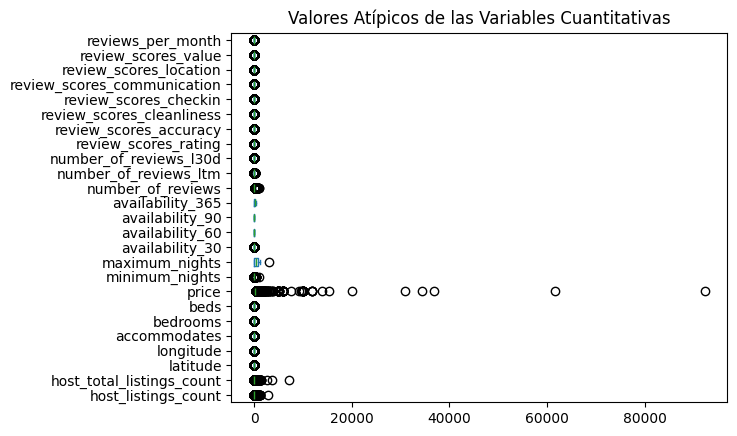

In [85]:
# realizamos diagrama de caja o bigote de cada columna del dataset completo
fig = plt.figure(figsize=(15, 15))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos de las Variables Cuantitativas')
plt.show()

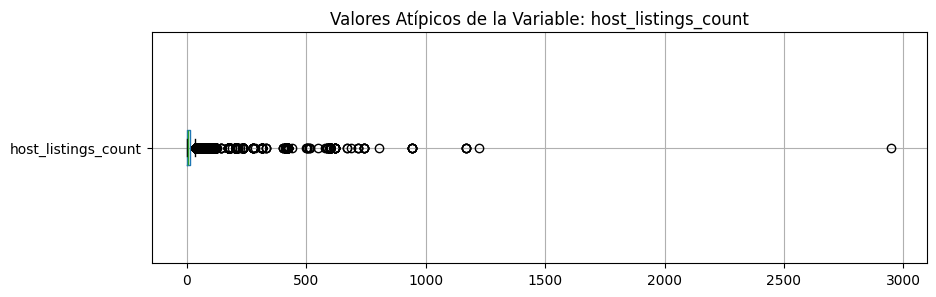

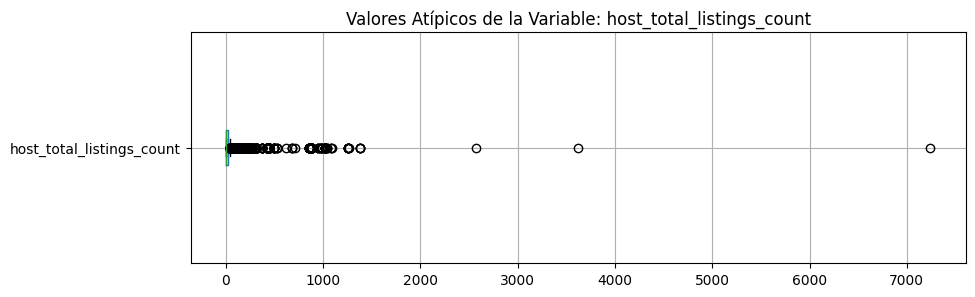

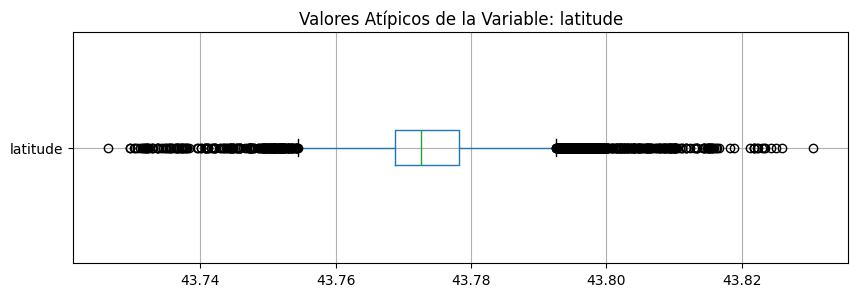

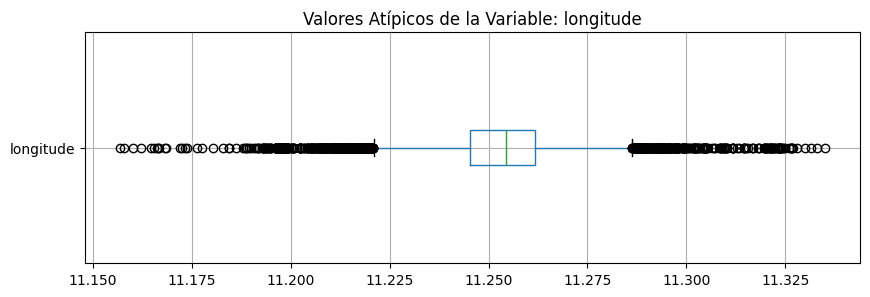

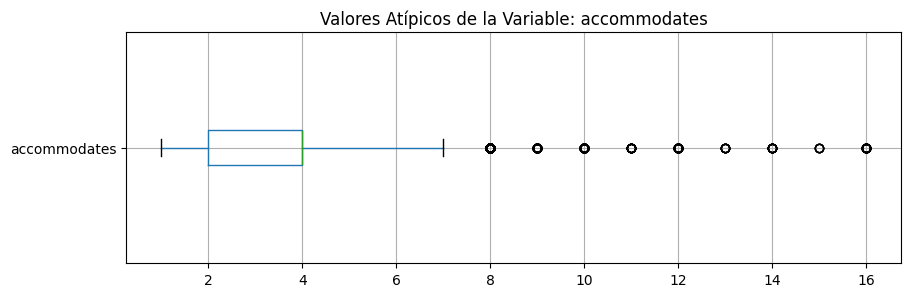

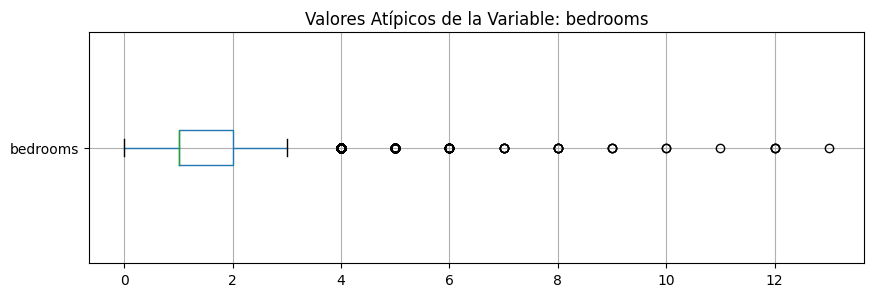

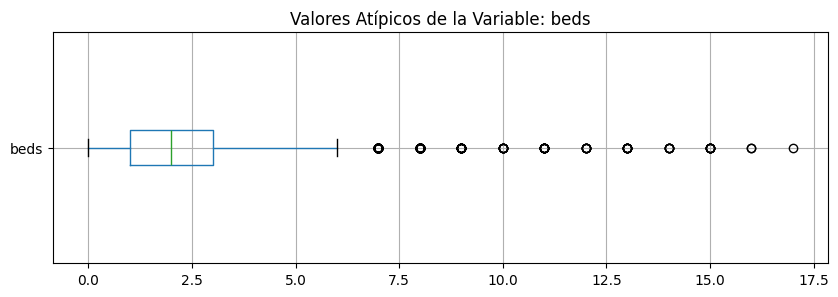

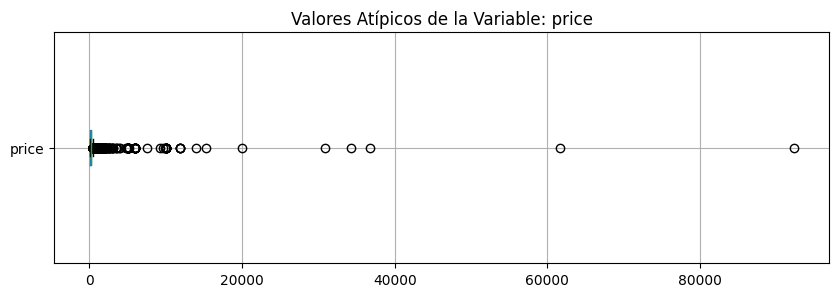

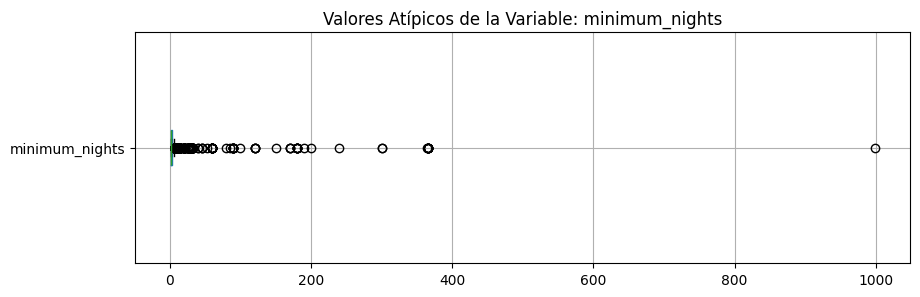

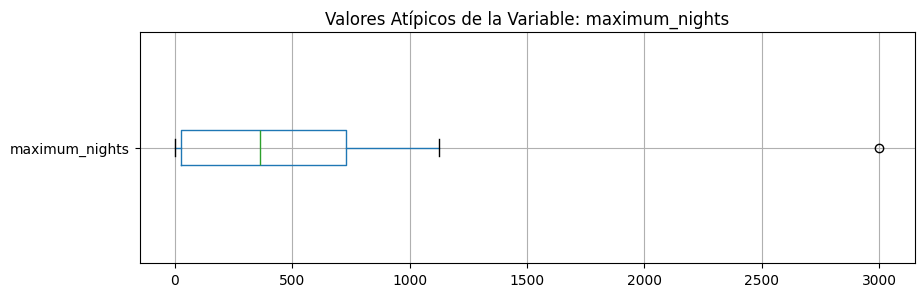

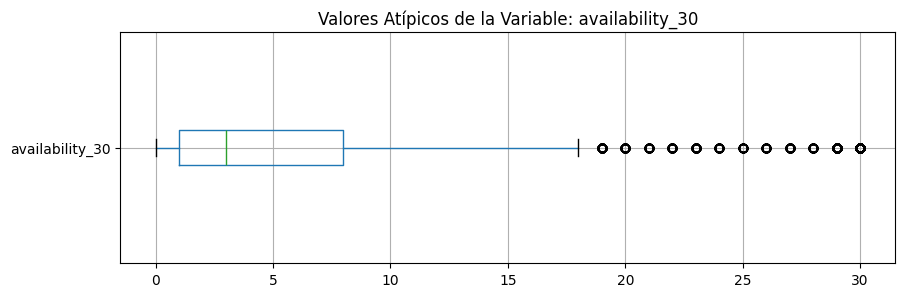

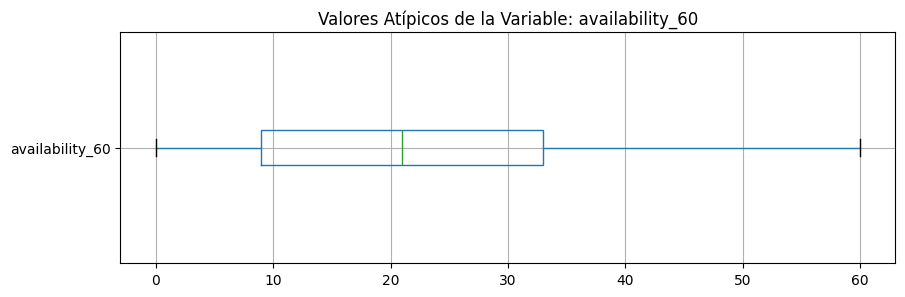

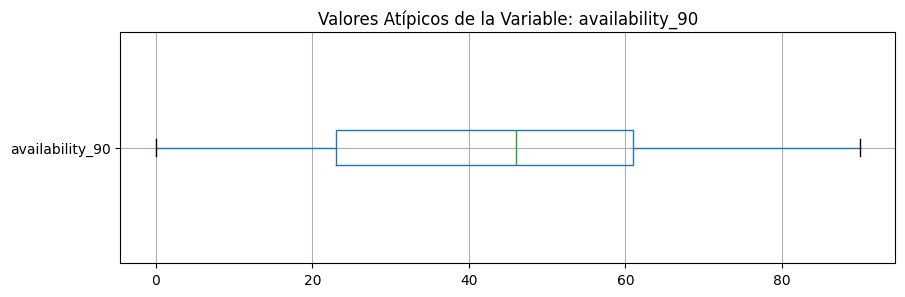

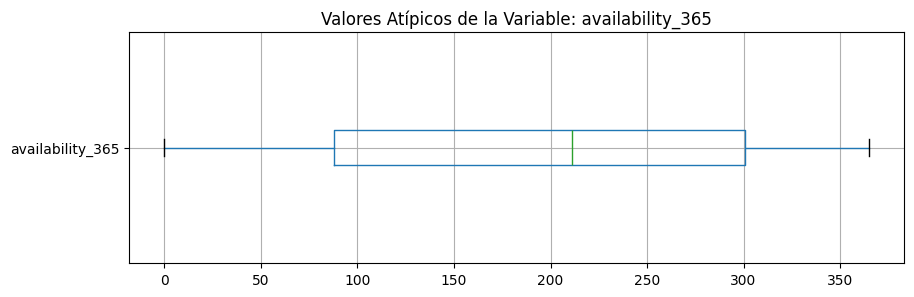

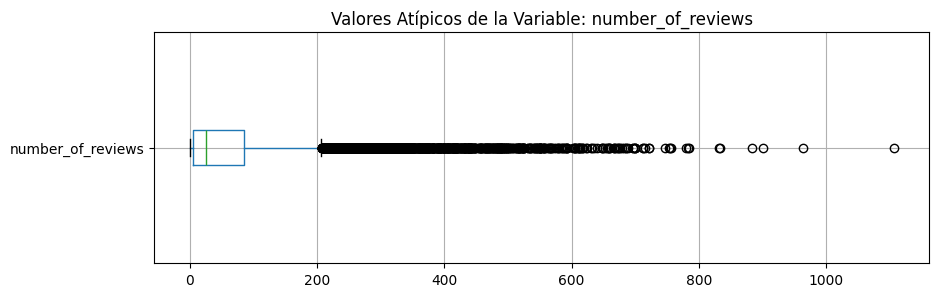

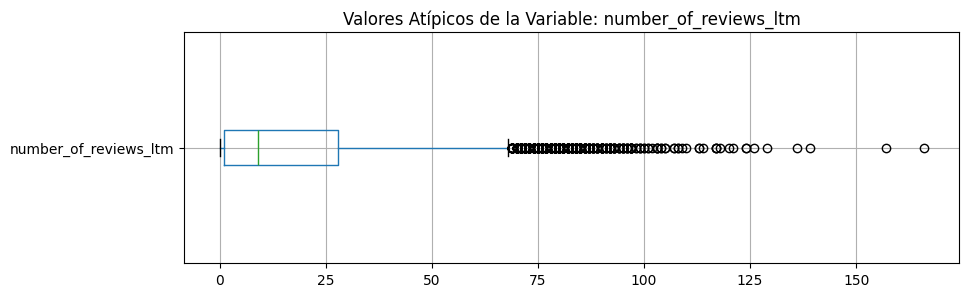

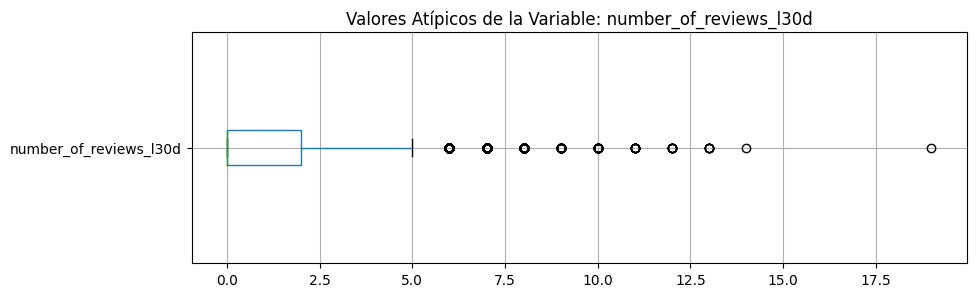

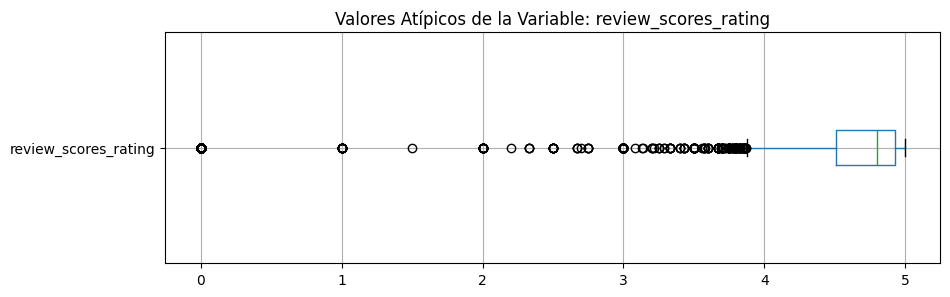

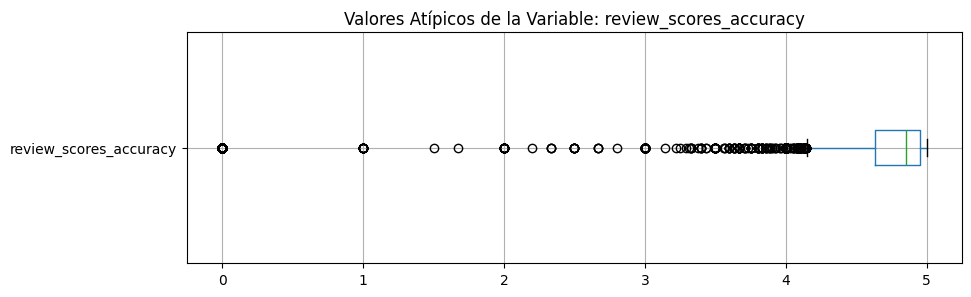

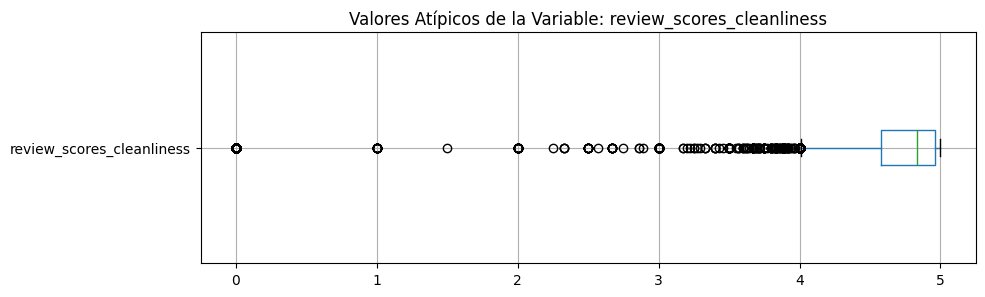

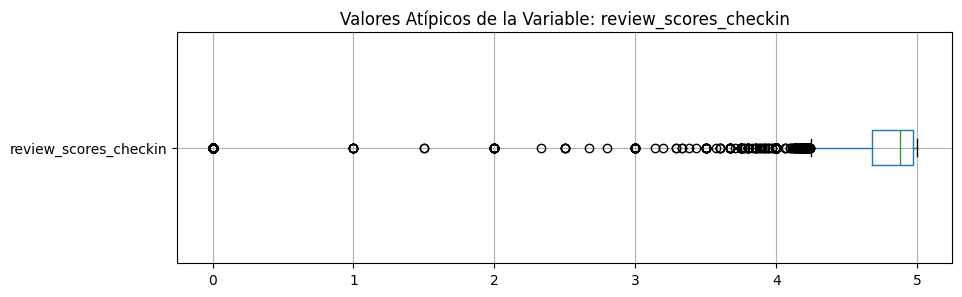

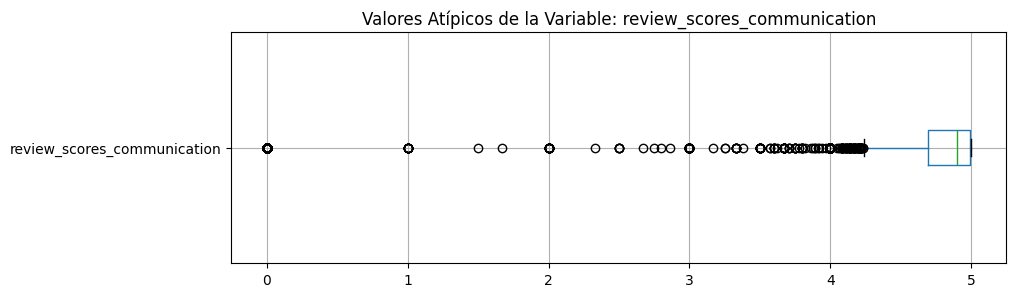

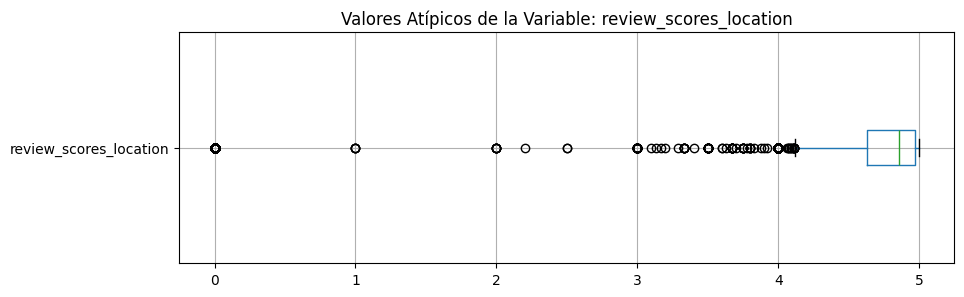

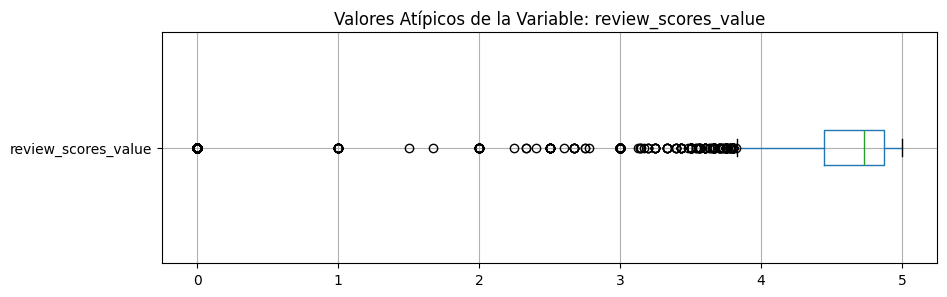

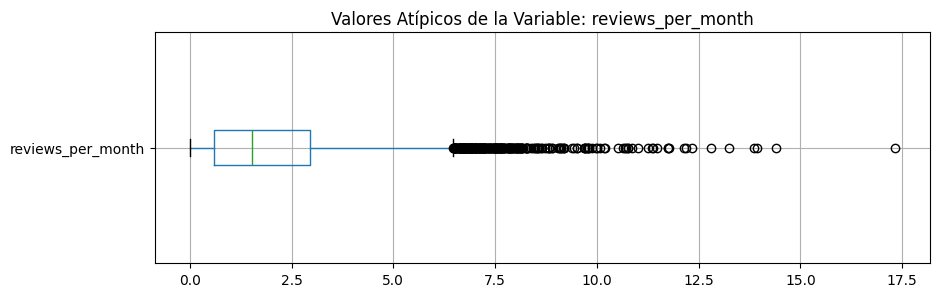

In [86]:
# realizamos el diagrama de caja de cada columna de forma individual
for column in cuantitativas.columns:
    plt.figure(figsize=(10, 3))
    cuantitativas.boxplot(column=column, vert=False)
    plt.title(f'Valores Atípicos de la Variable: {column}')
    plt.show()

In [87]:
## Método de Desviación Estandar Para Detectar Valores Atípicos

In [88]:
y=cuantitativas
Limite_Superior=y.mean() + 3*y.std()
Limite_Inferior=y.mean() - 3*y.std()
print("------------ Limite Superior -------------  \n", Limite_Superior)
print("------------ Limite Inferior -------------  \n", Limite_Inferior)

------------ Limite Superior -------------  
 host_listings_count             346.236188
host_total_listings_count       500.502037
latitude                         43.802917
longitude                        11.303327
accommodates                      9.659750
bedrooms                          4.153954
beds                              6.476235
price                          4024.677551
minimum_nights                   50.514522
maximum_nights                 1723.385183
availability_30                  27.342576
availability_60                  69.833458
availability_90                 118.639371
availability_365                537.640118
number_of_reviews               393.543598
number_of_reviews_ltm            79.909839
number_of_reviews_l30d            7.345134
review_scores_rating              8.748149
review_scores_accuracy            8.822901
review_scores_cleanliness         8.804855
review_scores_checkin             8.873472
review_scores_communication       8.896265
review_s

In [89]:
# obtenemos los datos y los outliers se convierten en NaN
df2 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
df2

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,39.0,41.0,43.777090,11.252160,2.0,1.0,1.0,95.0,1.0,99.0,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,1.0,1.0,43.761570,11.277410,2.0,1.0,1.0,95.0,1.0,5.0,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,1.0,1.0,43.768320,11.243480,4.0,2.0,4.0,130.0,6.0,31.0,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,105.0,2.0,15.0,...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,102.5,2.0,15.0,...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,4.0,4.0,43.768061,11.258629,8.0,4.0,4.0,472.0,3.0,28.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12718,1.0,1.0,43.759080,11.280310,6.0,2.0,3.0,199.0,1.0,365.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12719,1.0,1.0,43.769656,11.282492,4.0,2.0,3.0,80.0,2.0,14.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12720,2.0,2.0,43.777013,11.243379,4.0,1.0,2.0,220.0,1.0,365.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [90]:
# corroboramos valores nulos
nulos = df2.isnull().sum()
nulos

host_listings_count            438
host_total_listings_count      179
latitude                       227
longitude                      242
accommodates                   202
bedrooms                       114
beds                           176
price                           65
minimum_nights                  56
maximum_nights                   1
availability_30                410
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              328
number_of_reviews_ltm          201
number_of_reviews_l30d         194
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
reviews_per_month              154
dtype: int64

In [91]:
# realizamos una copia del dataframe y remplazamos valores atípicos por la media
data_clean = df2.copy()
data_clean = data_clean.fillna(round(df2.mean(), 1))
data_clean

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,39.0,41.0,43.777090,11.252160,2.0,1.0,1.0,95.0,1.0,99.0,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,1.0,1.0,43.761570,11.277410,2.0,1.0,1.0,95.0,1.0,5.0,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,1.0,1.0,43.768320,11.243480,4.0,2.0,4.0,130.0,6.0,31.0,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,105.0,2.0,15.0,...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,102.5,2.0,15.0,...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,4.0,4.0,43.768061,11.258629,8.0,4.0,4.0,472.0,3.0,28.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12718,1.0,1.0,43.759080,11.280310,6.0,2.0,3.0,199.0,1.0,365.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12719,1.0,1.0,43.769656,11.282492,4.0,2.0,3.0,80.0,2.0,14.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12720,2.0,2.0,43.777013,11.243379,4.0,1.0,2.0,220.0,1.0,365.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [92]:
# corroboramos valores nulos
nulos = data_clean.isnull().sum()
nulos

host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [93]:
# unimos las variables cualitativas con las cuantitativas
dataset_limpio = pd.concat([df_ids, cualitativas, data_clean], axis=1)
dataset_limpio

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,1244899380239866505,5437242,city scrape,Palazzo Nori elegant & renovated,Welcome to the heart of Florence! Elegant and ...,S/D,Serena,2013-03-12,"Florence, Italy","Sono un architetto e vivo a Firenze, adoro ess...",...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12718,1245523314672846496,40765856,city scrape,Celestial,Bring the whole family to this fantastic accom...,S/D,Francesca,2015-08-07,"Turin, Italy",S/D,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12719,1245670462241721407,652022283,city scrape,alberti view,The accommodation is located in the famous squ...,S/D,Giovanni,2024-09-14,"Florence, Italy",più animali entrano più persone si vedono,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
12720,1246427901403972447,268765512,city scrape,Relax and charme in Santa Maria Novella,Enjoy a stylish vacation at this centrally loc...,S/D,Mia,2019-06-15,Italy,S/D,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [94]:
# corroboramos valores nulos
nulos = dataset_limpio.isnull().sum()
nulos

id                             0
host_id                        0
source                         0
name                           0
description                    0
neighborhood_overview          0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_verifications             0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
has_availability               0
first_review                   0
last_review                    0
instant_bookable               0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bedrooms  

In [95]:
# guardamos el dataset limpio
dataset_limpio.to_csv('dataset_Florencia_Desviación-Estandar_limpio.csv', index=False)

## Método de Cuartiles para Detectar Valores Atípicos

In [96]:
# método aplicando rango intercuartílico para detectar outliers

y = cuantitativas

percentile25 = y.quantile(0.25) # Q1
percentile75 = y.quantile(0.75) # Q3
IQR = percentile75 - percentile25

Limite_Superior_IQR = percentile75 + 1.5*IQR
Limite_Inferior_IQR = percentile25 - 1.5*IQR

print("------------ Limite Superior -------------  \n", Limite_Superior_IQR)
print("------------ Limite Inferior -------------  \n", Limite_Inferior_IQR)

------------ Limite Superior -------------  
 host_listings_count              36.000000
host_total_listings_count        42.000000
latitude                         43.792576
longitude                        11.286245
accommodates                      7.000000
bedrooms                          3.500000
beds                              6.000000
price                           420.500000
minimum_nights                    6.000000
maximum_nights                 1781.500000
availability_30                  18.500000
availability_60                  69.000000
availability_90                 118.000000
availability_365                620.500000
number_of_reviews               207.500000
number_of_reviews_ltm            68.500000
number_of_reviews_l30d            5.000000
review_scores_rating              5.560000
review_scores_accuracy            5.430000
review_scores_cleanliness         5.530000
review_scores_checkin             5.405000
review_scores_communication       5.440000
review_s

In [97]:
# obtenemos los datos y los outliers se convierten en NaN
df3_iqr = cuantitativas[(y <= Limite_Superior_IQR) & (y >= Limite_Inferior_IQR)]
df3_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,NaN,41.0,43.777090,11.252160,2.0,1.0,1.0,95.0,1.0,99.0,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,1.0,1.0,43.761570,11.277410,2.0,1.0,1.0,95.0,1.0,5.0,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,1.0,1.0,43.768320,11.243480,4.0,2.0,4.0,130.0,6.0,31.0,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,105.0,2.0,15.0,...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,102.5,2.0,15.0,...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,4.0,4.0,43.768061,11.258629,NaN,NaN,4.0,NaN,3.0,28.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
12718,1.0,1.0,43.759080,11.280310,6.0,2.0,3.0,199.0,1.0,365.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
12719,1.0,1.0,43.769656,11.282492,4.0,2.0,3.0,80.0,2.0,14.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
12720,2.0,2.0,43.777013,11.243379,4.0,1.0,2.0,220.0,1.0,365.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [98]:
# corroboramos valores nulos
nulos = df3_iqr.isnull().sum()
nulos

host_listings_count            1985
host_total_listings_count      2074
latitude                        846
longitude                       840
accommodates                    590
bedrooms                        360
beds                            176
price                          1080
minimum_nights                  465
maximum_nights                    1
availability_30                 978
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews              1255
number_of_reviews_ltm           401
number_of_reviews_l30d          649
review_scores_rating           1662
review_scores_accuracy         1818
review_scores_cleanliness      1827
review_scores_checkin          1775
review_scores_communication    1755
review_scores_location         1669
review_scores_value            1695
reviews_per_month               275
dtype: int64

In [99]:
# realizamos una copia del dataframe y remplazamos valores atípicos por la media
data_clean_iqr = df3_iqr.copy()
data_clean_iqr = data_clean_iqr.fillna(round(df3_iqr.mean(), 1))
data_clean_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,6.0,41.0,43.777090,11.252160,2.0,1.0,1.0,95.0,1.0,99.0,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,1.0,1.0,43.761570,11.277410,2.0,1.0,1.0,95.0,1.0,5.0,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,1.0,1.0,43.768320,11.243480,4.0,2.0,4.0,130.0,6.0,31.0,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,105.0,2.0,15.0,...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,10.0,12.0,43.775250,11.252580,2.0,1.0,1.0,102.5,2.0,15.0,...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,4.0,4.0,43.768061,11.258629,3.6,1.4,4.0,163.0,3.0,28.0,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12718,1.0,1.0,43.759080,11.280310,6.0,2.0,3.0,199.0,1.0,365.0,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12719,1.0,1.0,43.769656,11.282492,4.0,2.0,3.0,80.0,2.0,14.0,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12720,2.0,2.0,43.777013,11.243379,4.0,1.0,2.0,220.0,1.0,365.0,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00


In [100]:
# corroboramos valores nulos
nulos = data_clean_iqr.isnull().sum()
nulos

host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [101]:
# unimos las variables cualitativas con las cuantitativas
dataset_limpio_iqr = pd.concat([ df_ids, cualitativas, data_clean_iqr], axis=1)
dataset_limpio_iqr

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,31840,380378,previous scrape,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",S/D,Officina 360,2011-02-07,"Florence, Italy",360 Rentals has been offering fully furnished ...,...,5.0,0.0,4.66,4.73,4.87,4.86,4.91,4.91,4.70,0.77
1,32120,99235,city scrape,Welcome at Corte Verde in Florence,Apartment at a 30 minute walk from Ponte Vecch...,S/D,Lucia,2010-03-26,"Florence, Italy",I was born and raised in the beautiful Florenc...,...,1.0,0.0,4.88,4.88,4.88,4.84,4.96,4.63,4.63,0.15
2,32180,13925330,city scrape,Charming Gem - Oltrarno City centre,.,S/D,Cesare,2014-04-05,"Florence, Italy",.,...,4.0,0.0,4.74,4.79,4.85,4.79,4.70,4.82,4.85,0.21
3,39115,167739,city scrape,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,8.0,0.0,4.53,4.68,4.60,4.81,4.74,4.90,4.55,0.46
4,39165,167739,previous scrape,Florence Central Double Private Bathroom,"Double room private bathroom: comfortable, lar...","San Lorenzo Church, the market and Cappelle Me...",Lorenzo,2010-07-15,"Florence, Italy","Casa Billi, now renewed, is centrally located ...",...,2.0,0.0,4.32,4.21,4.58,4.68,4.63,4.95,4.32,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12717,1244899380239866505,5437242,city scrape,Palazzo Nori elegant & renovated,Welcome to the heart of Florence! Elegant and ...,S/D,Serena,2013-03-12,"Florence, Italy","Sono un architetto e vivo a Firenze, adoro ess...",...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12718,1245523314672846496,40765856,city scrape,Celestial,Bring the whole family to this fantastic accom...,S/D,Francesca,2015-08-07,"Turin, Italy",S/D,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12719,1245670462241721407,652022283,city scrape,alberti view,The accommodation is located in the famous squ...,S/D,Giovanni,2024-09-14,"Florence, Italy",più animali entrano più persone si vedono,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00
12720,1246427901403972447,268765512,city scrape,Relax and charme in Santa Maria Novella,Enjoy a stylish vacation at this centrally loc...,S/D,Mia,2019-06-15,Italy,S/D,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.80,4.70,1.00


In [102]:
# corroboramos valores nulos
nulos = dataset_limpio_iqr.isnull().sum()
nulos

id                             0
host_id                        0
source                         0
name                           0
description                    0
neighborhood_overview          0
host_name                      0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_verifications             0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
has_availability               0
first_review                   0
last_review                    0
instant_bookable               0
host_listings_count            0
host_total_listings_count      0
latitude                       0
longitude                      0
accommodates                   0
bedrooms  

In [103]:
# guardamos el dataset limpio
dataset_limpio_iqr.to_csv('dataset_Florencia_Rango-Intercuartílico_limpio.csv', index=False)